In [1]:
import pickle
import pandas as pd

import matplotlib.pyplot as plt

from matplotlib.pyplot import (
    matshow,
    colorbar,
    xlabel,
    ylabel,
    plot,
    legend,
    grid,
)

def recortar(x):
    return x[100:-120, 110:-110]

def recorta2(x):
    return x[15:,95:-110]

def recorta3(x):
    return x[25:,120:-120]


In [2]:
# Cargar las variables desde el archivo pickle
with open('datos_resultados/resultados_metrica_completa/recon_osem_crit0-005.pickle', 'rb') as file:
    reconstruccion = pickle.load(file)


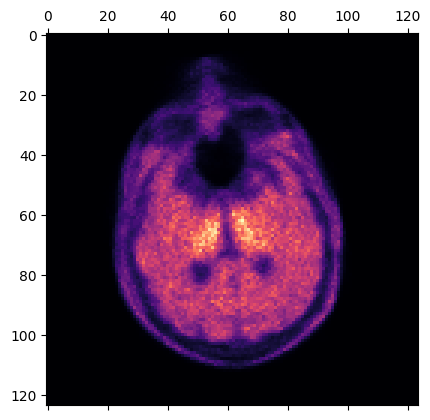

In [3]:
matshow(recortar(reconstruccion[-1][75,:,:]), cmap='magma')
plt.savefig('matshow_figure.png')

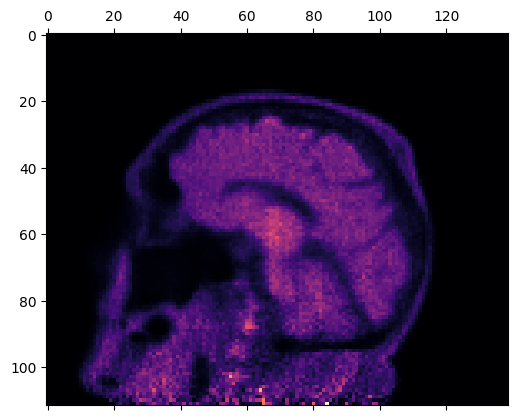

In [4]:
matshow(recorta2(reconstruccion[-1][:,:,175]), cmap='magma')

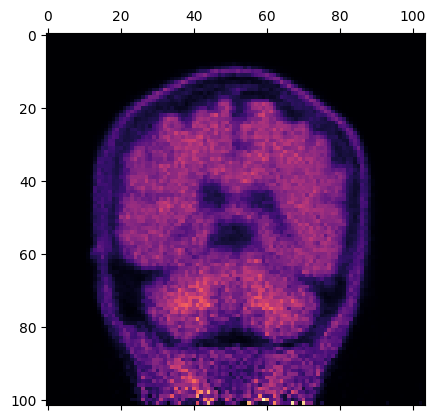

In [5]:
matshow(recorta3(reconstruccion[-1][:,175,:]), cmap='magma')

In [6]:
ruta = 'datos_resultados/reconstruccion_osem/'

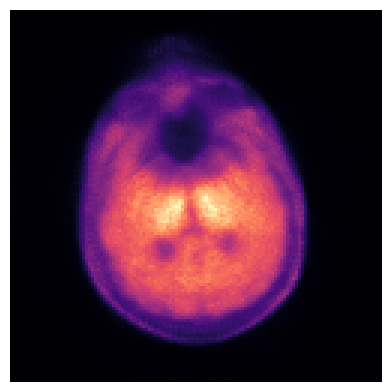

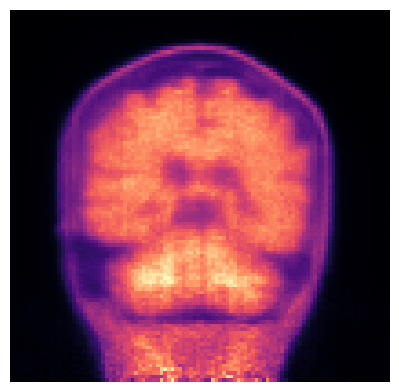

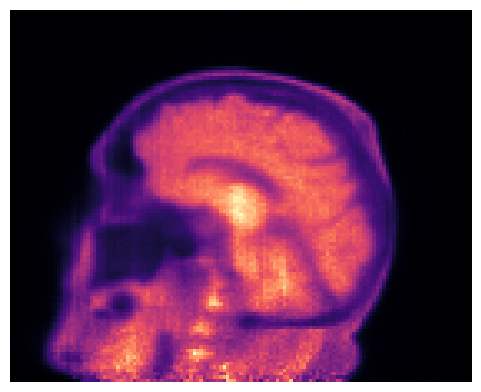

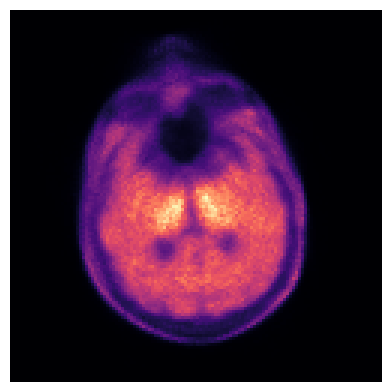

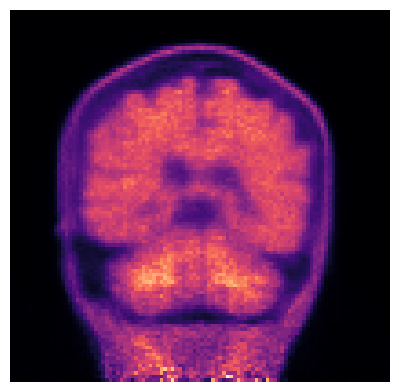

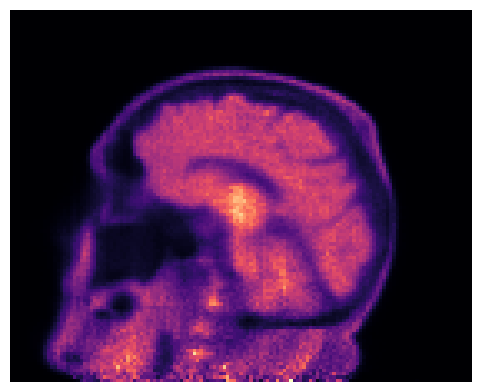

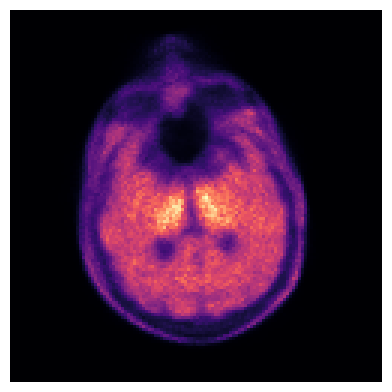

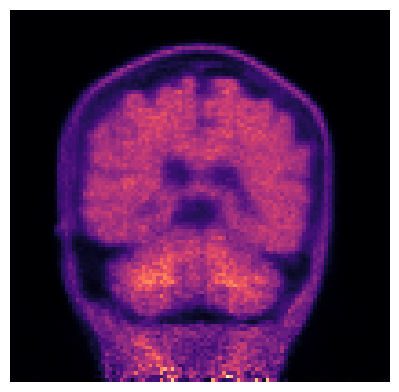

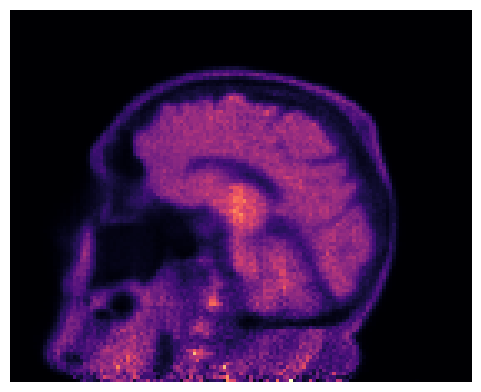

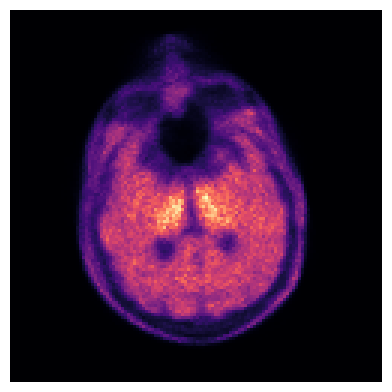

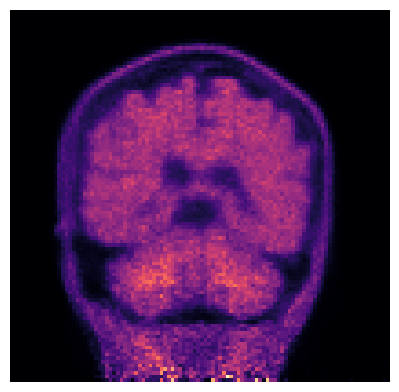

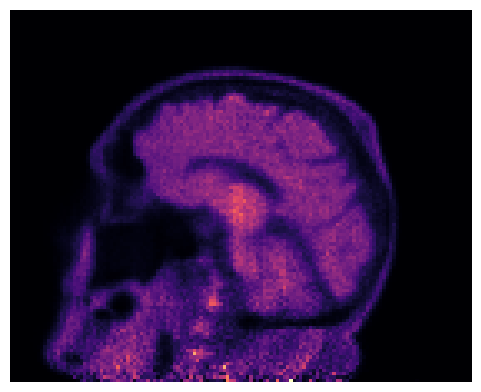

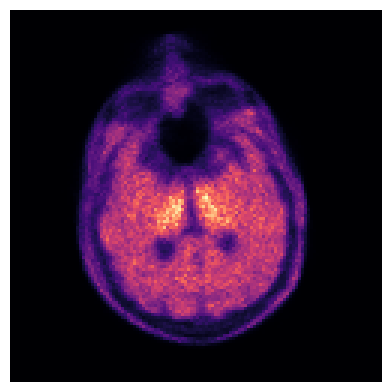

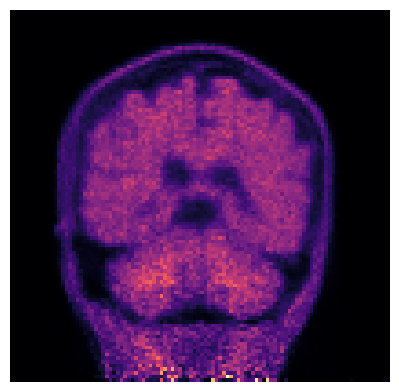

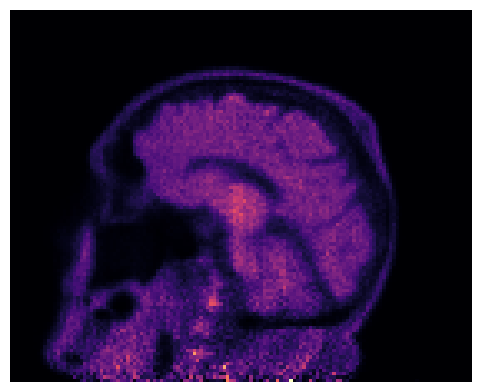

In [7]:
# listado_guardar = [0,4,9]
listado_guardar = range(len(reconstruccion))

for i in listado_guardar:
    matshow(recortar(reconstruccion[i][75,:,:]), cmap='magma')
    plt.axis('off')
    plt.savefig(f'{ruta}osem_{i}_transversal.png')

    matshow(recorta3(reconstruccion[i][:,175,:]), cmap='magma')
    plt.axis('off')
    plt.savefig(f'{ruta}osem_{i}_sagital.png')

    matshow(recorta2(reconstruccion[i][:,:,175]), cmap='magma')
    plt.axis('off')
    plt.savefig(f'{ruta}osem_{i}_coronal.png')

In [8]:
len(reconstruccion)

5

## Datos de las iteraciones

In [9]:
# Cargar las variables desde el archivo pickle
with open('datos_resultados/resultados_metrica_completa/datos_iteraciones_osem_crit0-005.pickle', 'rb') as file:
    datos_iteraciones = pickle.load(file)


In [23]:
df_datos_iteraciones = pd.DataFrame(datos_iteraciones)

In [24]:
df_datos_iteraciones['tiempo_acumulado'] = df_datos_iteraciones['tiempo_iteracion'].cumsum()

In [12]:
import numpy as np

In [25]:
df_datos_iteraciones['diferencia_ssim'] = np.round(1 - df_datos_iteraciones['SSIM'],4)*100

In [26]:
df_datos_iteraciones = df_datos_iteraciones.drop(columns=['MSE'])

In [27]:
df_datos_iteraciones.head()

,iteracion,tiempo_iteracion,PSNR,SSIM,tiempo_acumulado,diferencia_ssim
0,-1,0.000000,0.000000,0.000000,0.000000,100.00
1,1,21.644861,46.542987,0.959644,21.644861,4.04
2,2,48.172263,54.297595,0.983177,69.817123,1.68
3,3,75.121001,58.754811,0.991303,144.938124,0.87
4,4,101.085376,61.187099,0.994855,246.023500,0.51


In [28]:
df_datos_iteraciones.to_csv('datos_resultados/resultados_metrica_completa/datos_iteraciones_osem.csv', index=False)

In [29]:
columnas = df_datos_iteraciones.columns
columnas = list(columnas.drop(['iteracion']))

In [30]:
print(df_datos_iteraciones.to_latex(columns=columnas,float_format="%.3f"))

\begin{tabular}{lrrrrr}
\toprule
 & tiempo_iteracion & PSNR & SSIM & tiempo_acumulado & diferencia_ssim \\
\midrule
0 & 0.000 & 0.000 & 0.000 & 0.000 & 100.000 \\
1 & 21.645 & 46.543 & 0.960 & 21.645 & 4.040 \\
2 & 48.172 & 54.298 & 0.983 & 69.817 & 1.680 \\
3 & 75.121 & 58.755 & 0.991 & 144.938 & 0.870 \\
4 & 101.085 & 61.187 & 0.995 & 246.024 & 0.510 \\
5 & 126.957 & 63.446 & 0.997 & 372.980 & 0.280 \\
\bottomrule
\end{tabular}

